## t-SNE

- t-distributed Stochastic Neighbor Embedding
- Manifold Learning

### Dimensionality Reduction

- curse of dimensionality로 인하여 차원이 커지면 커질수록 손실이 발생  
    -> 차원 축소가 필요

- 시각화를 위해서라도 2차원, 3차원으로 축소가 필요함


### 방법

- projection
    - 기존 feature들의 선형 결합으로 새로운 feature를 만들어내기 때문에 correlated된 경우, 혹은 선형 관계인 경우에 데이터가 잘 projection됨

- Manifold Learning(Nonlinear Dimensionality Reduction)
    - non-linear한 구조의 데이터에서 주로 사용됨
    - 지도학습을 위한 전처리 용도로는 잘 사용되지 않음

    <img src="../../img/swiss_roll.png" width=500>

### t-Distributed Stochastic Neighbor Embedding

저차원 공간에서 기존에 멀었던 애들은 멀게, 가까웠던 애들은 가깝게 표현하는 것이 목적임.  

- 각 데이터를 랜덤하게 저차원 공간에 뿌림.
- 기존 feature space에서 가까웠으면 가깝게, 멀었으면 멀게 만듬

- 새 데이터가 나왔을 때 기존 저차원 공간에 매핑하는 함수가 없음

### 수식

$D = {x_1, x_2, ..., x_n}$이고 $x_i = (x_{i1}, ..., x+{id}) \in \mathbb{R}^d$인 데이터셋이 존재한다 가정  

$d$차원의 데이터를 $r$차원으로 전사한다고 했을 때  

1. pairwise similarity $p_{ij}$를 원본 데이터 포인트에서 계산  
2. 다변량 정규분포에 입각한 r차원의 표현 $Z^{(0)} = {z_1, z_2, ..., z_n}$을 초기화  
3. 다음 과정을 반복함(t번째라 가정)  
    - $Z^{(t-1)}$의 pairwise similarity $q_{ij}$ 계산
    - 기울기 $\nabla_z KL(P||Q)$ 계산
    - $Z^{(t)} = Z^{(t-1)} + \eta\nabla_z KL(P||Q) + \alpha(t)(Z^{(t-1)}-Z^{(t-2)})$ 설정  

    * KL: Kullback-Leibler Divergence, 두 개의 분포 간의 차이를 계산 시 사용.
    * P: 기존 데이터의 유사도 분포, Q: 저차원에서의 유사도 분포
    * ($\eta$: learning rate, $\alpha(t)$: momentum)  
    * $\alpha(t)$는 모멘텀 계수로, 이전 방향을 반영해서 같은 방향으로 기울기가 나오면 가속도를 붙이고, 다른 방향이면 충돌을 완화함  
        - 0~1 사이 값
        - t값에 따라 모멘텀 계수를 달리 설정할 수 있음(ex.초반에는 작게해서 탐색 위주, 후반에는 크게해서 빨리 수렴하게)


- 차원이 너무 큰 경우 PCA와 같은 기법으로 차원을 낮추고 사용하는 것을 추천

### Mathematical Details

$p_{j|i}$: $x_i$가 $x_j$를 이웃으로 뽑을 조건부 확률. 이웃들이 $x_i$를 중심으로 한 정규분포에 있다고 가정   
$x_j$의 확률밀도함수 / 전체 데이터의 확률밀도함수 => 뽑힐 확률  

$$p_{j|i} =
\begin{cases}
\dfrac{\exp\!\left(-\dfrac{\|\mathbf{x}_j - \mathbf{x}_i\|^2}{\sigma_i^2}\right)}
{\sum\limits_{k \neq i} \exp\!\left(-\dfrac{\|\mathbf{x}_k - \mathbf{x}_i\|^2}{\sigma_i^2}\right)}, & i \neq j, \\[2.0ex]
\ 0 & i = j
\end{cases}
$$


$\sigma_i^2$: perplexity. 크면 더 많은 이웃이 보이게 하고 작으면 가까운 이웃만 보임 => 이웃 개수 조절이 가능  

$$Perp(P_i) = 2^{H(P_i)},  \ H(P_i) = - \sum_jp_{j|i}log_2p_{j|i}$$

$P_i$는 조건부 확률 $\{p_{j|i}\}$의 분포. $H(P_i)$는 엔트로피 식  
- $H(P_i)$가 작으면 특정 몇 개의 이웃에게만 확률이 집중, 크면 골고루 퍼져 있음


또한 비대칭함수이므로 $p_{ij}$ 조정  
$$p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}$$

- $p_{ij}$를 다 합쳤을 때 1이 나오게 하기 위해서 2n으로 나눔

저차원으로 만들기 위해서는 $q_{ij}$를 최대한 $p_{ij}$와 유사하게 만들어야 함  

저차원에서는 Cauchy 분포같은 tail이 두꺼운 분포를 사용함.  
- 단순히 가우시안을 사용하면 차원이 낮아서 서로 겹치게 되고 멀리 있는 점들을 떨어뜨려 놓지 못함. 때문에 tail이 두꺼운 분포를 사용

$$q_{ij} =
\begin{cases}
\dfrac{\left( 1 + \|\mathbf{z}_i - \mathbf{z}_j\|^2 \right)^{-1}}
{\sum\limits_{k \neq l} \left( 1 + \|\mathbf{z}_k - \mathbf{z}_l\|^2 \right)^{-1}}, & i \neq j, \\[2.0ex]
0, & i = j
\end{cases}
$$


KL 발산을 최소화하는 저차원 데이터포인트 $z_i$를 목표로 찾음 
$$KL(P||Q) = \sum_{i\neq j}p_{ij}log\frac{p_{ij}}{q_{ij}}$$

### 실습

#### Load Data

In [2]:
from sklearn.datasets import load_digits


digits = load_digits()
print(f"input shape: {digits.data.shape}")
print(f"target shape: {digits.target.shape}")

input shape: (1797, 64)
target shape: (1797,)


#### PCA

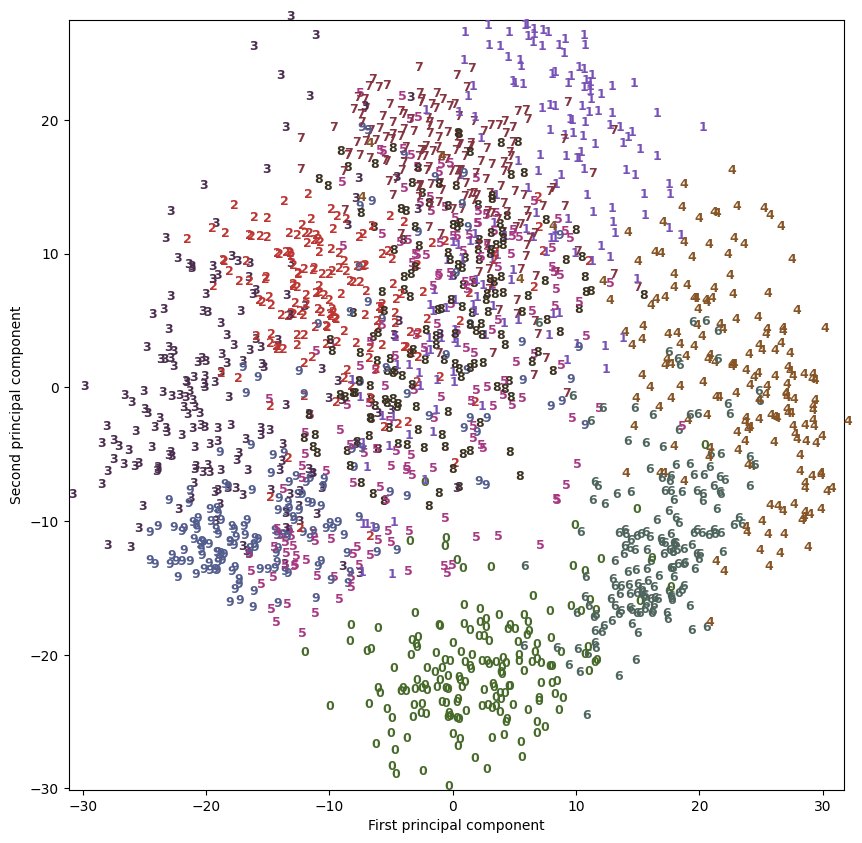

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline


pca = PCA(n_components=2)
digits_pca = pca.fit_transform(digits.data)

colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
'#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')

#### tSNE

In [5]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE


digits = load_digits()

tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 2')

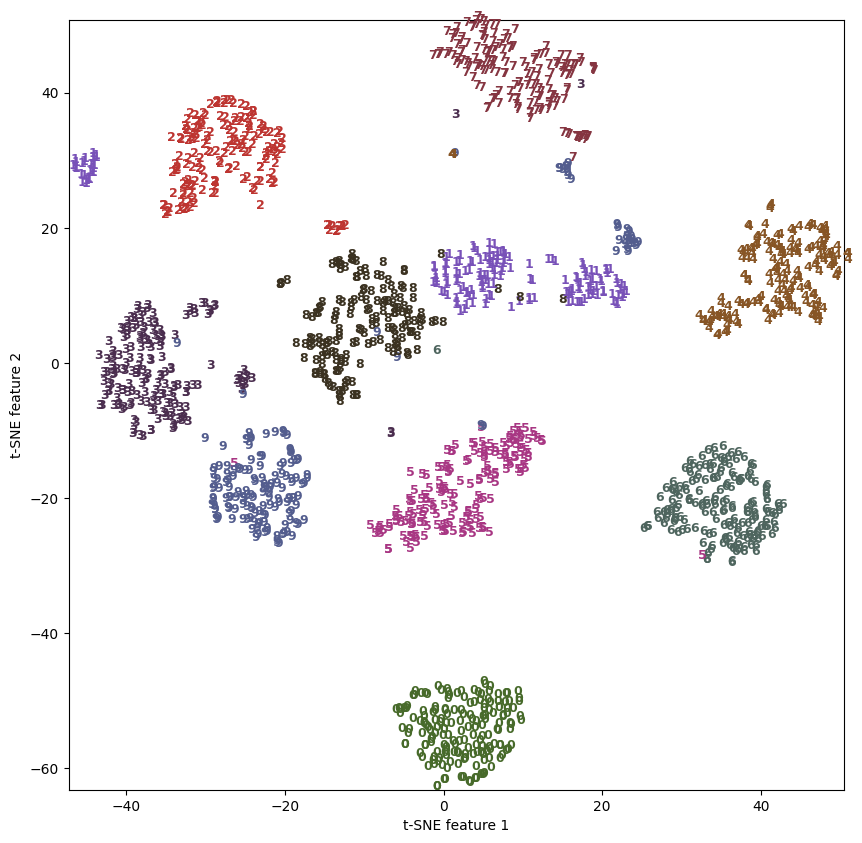

In [6]:
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
'#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
    
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')